# Reading the output from `simplelinear2dtex_1d_dd.cu`

We go from a flattened `std::vector` (C++, representing 2-dimensional data) to a `.csv` file.  

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [4]:
ld = [ 2.* np.pi, 2.* np.pi]
WIDTH  = 128
HEIGHT = 64
print WIDTH*HEIGHT
hd = [ld[0]/(float(WIDTH)), ld[1]/(float(HEIGHT)) ]

8192


In [6]:
# list the csv files we can import
import os
[filename for filename in os.listdir('./') if filename.find('.csv') >= 0 ]

['ddsinsin2dtex_result.csv',
 'simplelinear2dtex_dx_result.csv',
 'simplelinear2dtex_dx2_result.csv',
 'sinsin2dtex_result.csv',
 'simplelinear2dtex_dy_result.csv',
 'simplelinear2dtex_result.csv',
 'simplelinear2dtex_ogref.csv',
 'simpletexdyn_ogref.csv',
 'simpletexdyn_dx_result.csv',
 'sinsin2dtex_ogref.csv',
 'simplelinear2dtex_add_l_result.csv',
 'simplelinear2dtex_d_result.csv']

In [7]:
with open('simpletexdyn_dx_result.csv','r') as csvfile_dx_result:
    plot_dx_results = csv.reader(csvfile_dx_result, delimiter=',')
    dx_result_list = list(  list(rec) for rec in plot_dx_results ) 
    
with open('simpletexdyn_ogref.csv','r') as csvfile_ogref:
    plot_ogref = csv.reader(csvfile_ogref, delimiter=',')
    ogref_list = list(  list(rec) for rec in plot_ogref ) 
    

In [8]:
csvfile_dx_result.close()
csvfile_ogref.close()

In [9]:
# convert the strings in the list of lists into floats
dx_result_list = [[float(ele) for ele in row] for row in dx_result_list]
ogref_list = [[float(ele) for ele in row] for row in ogref_list]

In [10]:
# convert the list of lists of floats into numpy arrays
dx_result_list = np.array( dx_result_list)
ogref_list = np.array( ogref_list)

In [11]:
print dx_result_list.shape; print ogref_list.shape

(64, 128)
(64, 128)


In [12]:
# np.array_str from 
# cf. http://stackoverflow.com/questions/2891790/pretty-printing-of-numpy-array
print np.array_str(dx_result_list, precision=3, suppress_small=True); 
print np.array_str(ogref_list, precision=3, suppress_small=True)

[[ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.049  0.098  0.098 ...,  0.097  0.098  0.049]
 [ 0.098  0.195  0.194 ...,  0.193  0.194  0.097]
 ..., 
 [-0.145 -0.29  -0.289 ..., -0.287 -0.289 -0.145]
 [-0.098 -0.195 -0.194 ..., -0.193 -0.194 -0.097]
 [-0.049 -0.098 -0.098 ..., -0.097 -0.098 -0.049]]
[[ 0.     0.     0.    ..., -0.    -0.    -0.   ]
 [ 0.     0.005  0.01  ..., -0.014 -0.01  -0.005]
 [ 0.     0.01   0.019 ..., -0.029 -0.019 -0.01 ]
 ..., 
 [-0.    -0.014 -0.028 ...,  0.043  0.028  0.014]
 [-0.    -0.01  -0.019 ...,  0.029  0.019  0.01 ]
 [-0.    -0.005 -0.01  ...,  0.014  0.01   0.005]]


## Quick aside on *Wireframe plots* in `matplotlib`

cf. [`mplot3d` tutorial, `matplotlib`](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

In [13]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np

## Making `X,Y,Z` axes for `mplot3d` from the `.csv` files

In [16]:
X_sinsin = np.array( [[i*hd[0] for i in range(WIDTH)] for j in range(HEIGHT)] )
Y_sinsin = np.array( [[j*hd[1] for i in range(WIDTH)] for j in range(HEIGHT)] )
Z_sinsindxresult = dx_result_list
Z_sinsinogref  = ogref_list

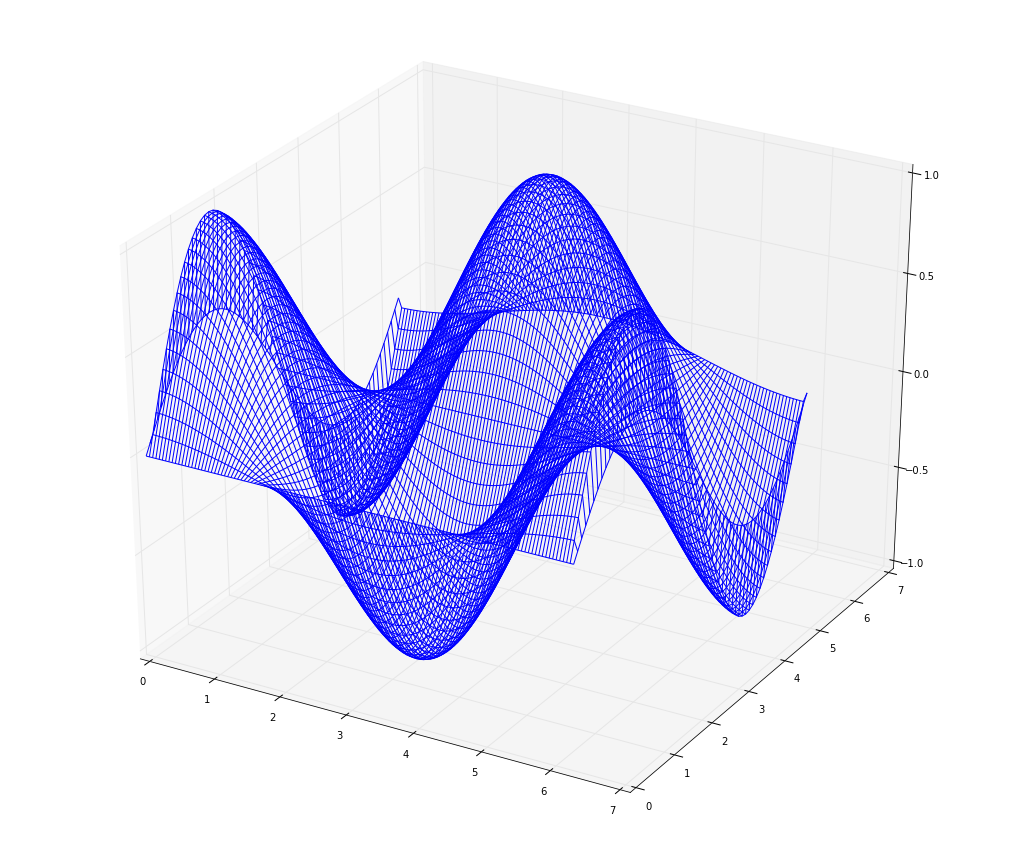

In [17]:
# cf. http://stackoverflow.com/questions/27326353/how-to-make-a-matplotlib-3d-scatter-plot-bigger
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X_sinsin, Y_sinsin, Z_sinsindxresult )

In [18]:
plt.show()

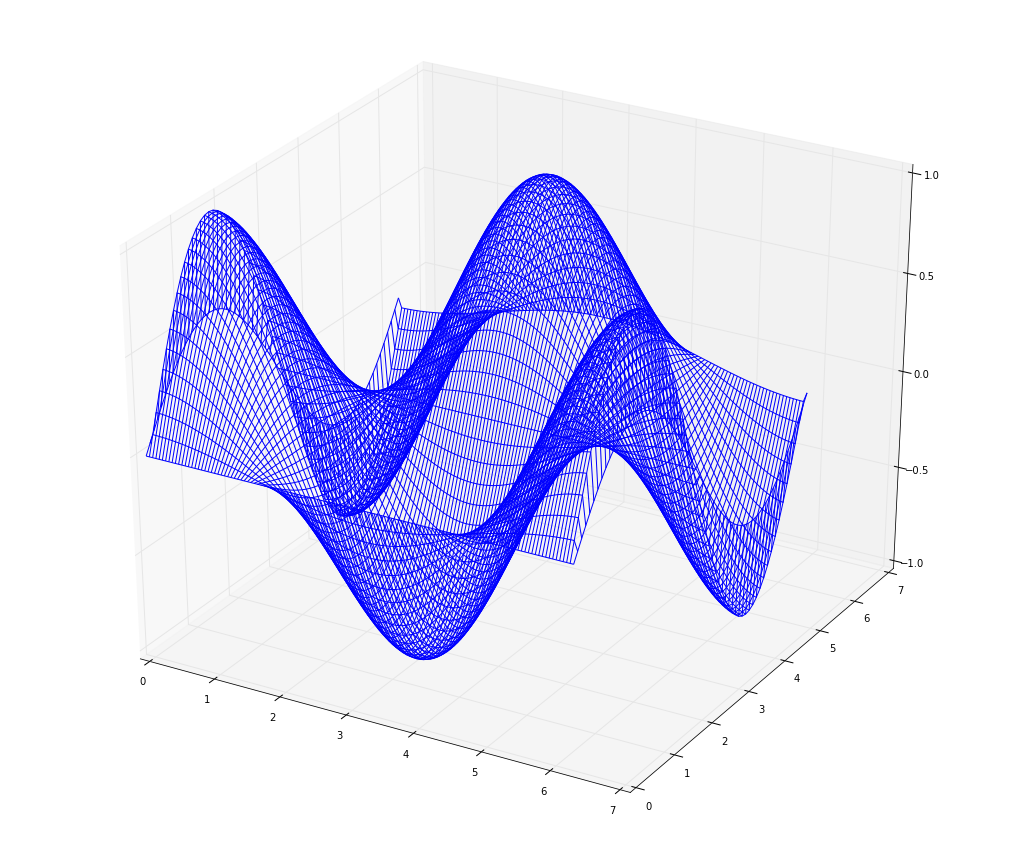

In [19]:
fig

$f(x) = cos(  x) \cdot sin(  y) \qquad \forall \, x, y \in [0,2 \pi]$

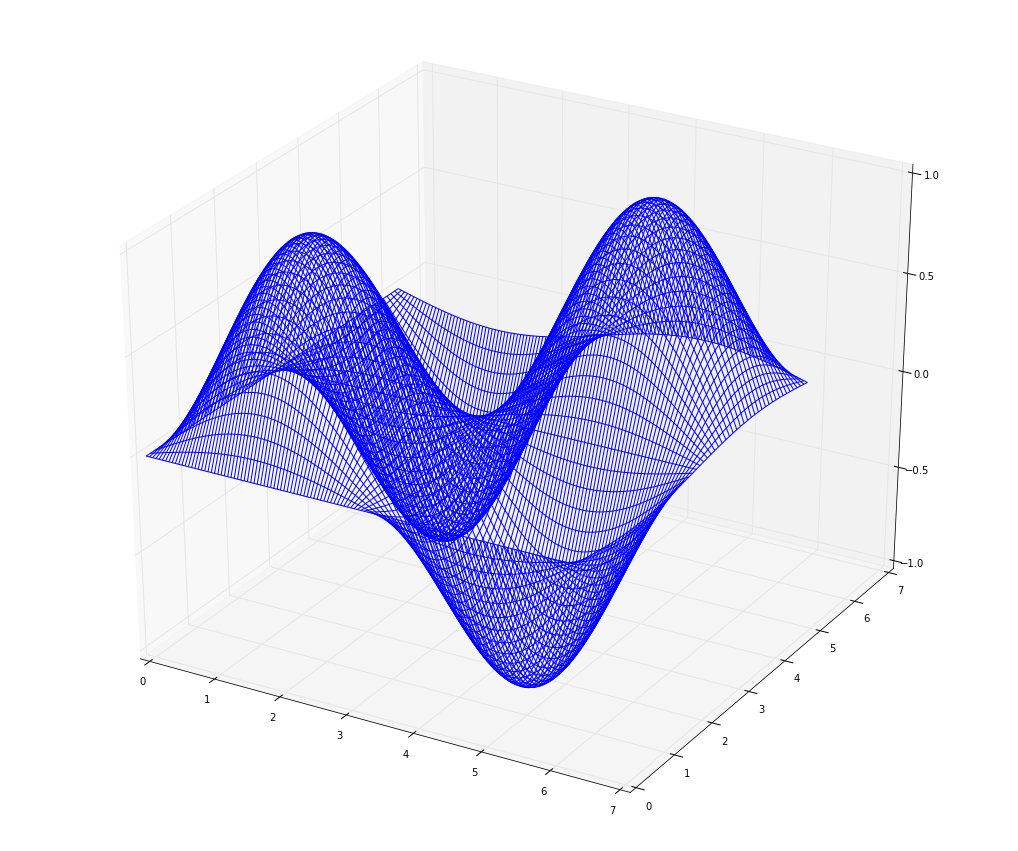

In [20]:
fig02 = plt.figure(figsize=(18,15))
ax02 = fig02.add_subplot(111,projection='3d')
ax02.plot_wireframe(X_sinsin, Y_sinsin, Z_sinsinogref )

$f(x) = sin(  x) \cdot sin( y) \qquad \forall \, x, y \in [0,2 \pi]$

In [25]:
plt.show()

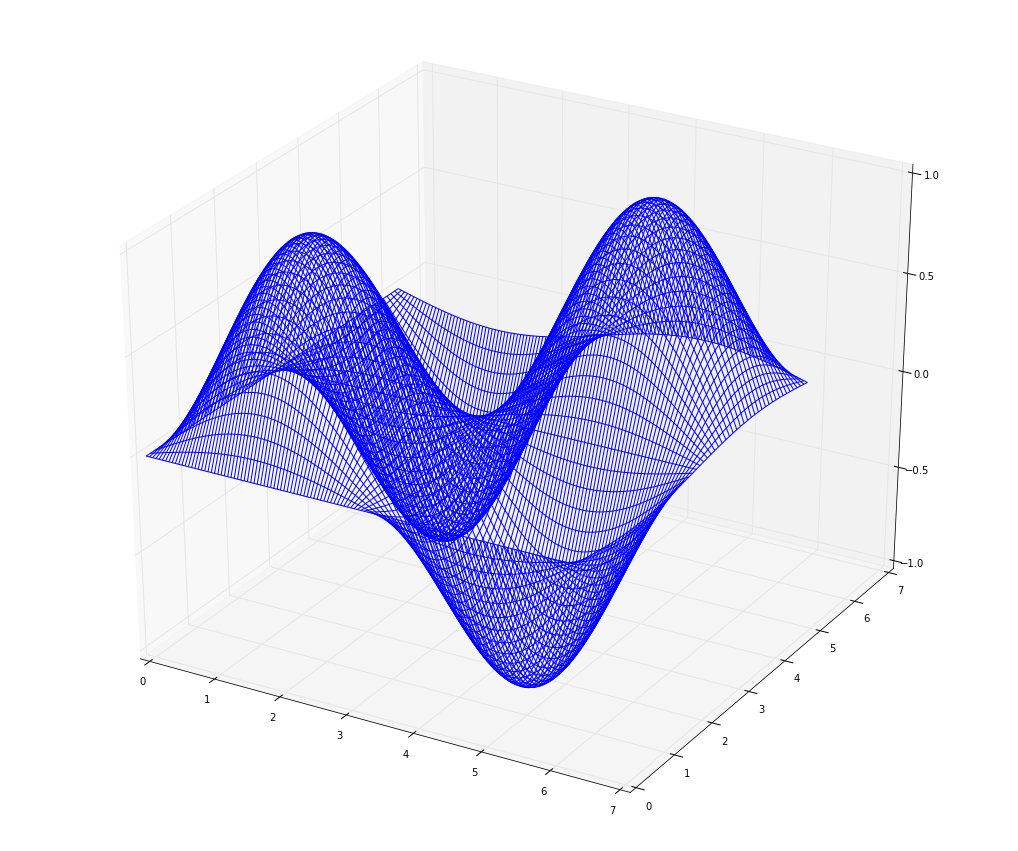

In [26]:
fig02

## Calculate errors

In [24]:
dxanalref = np.array( [[np.cos(i*hd[0])*np.sin(j*hd[1]) for i in range(WIDTH)] for j in range(HEIGHT)])

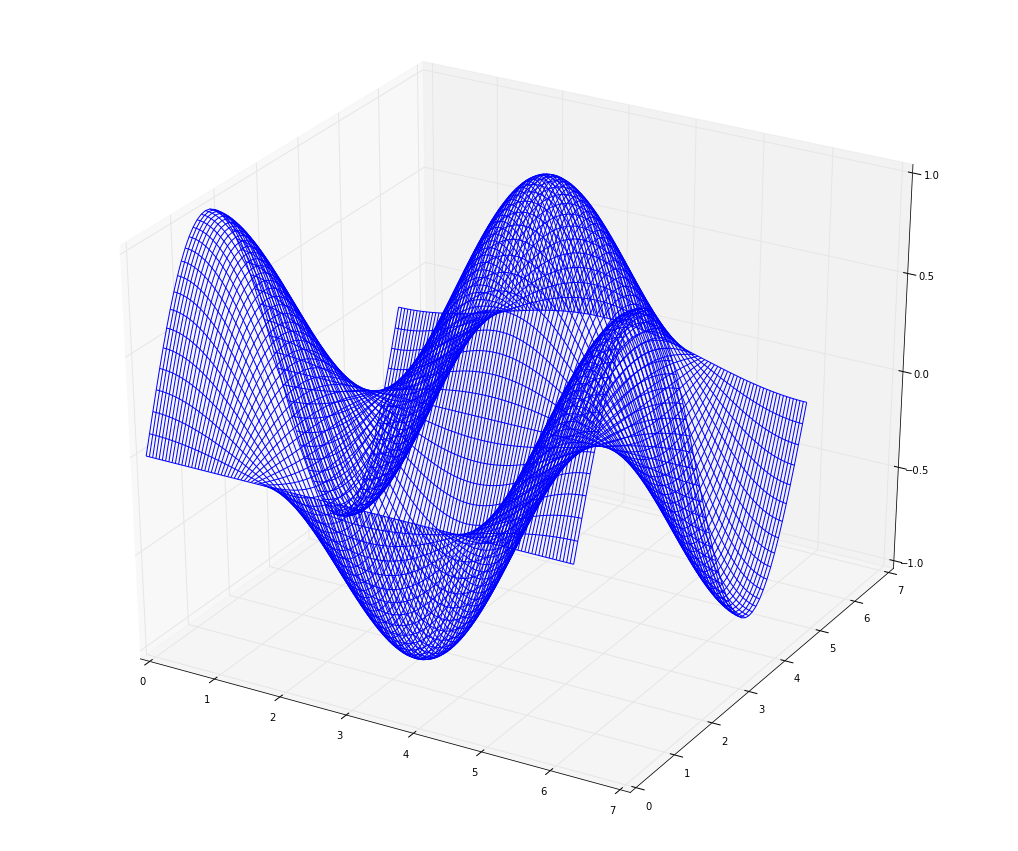

In [27]:
fig03 = plt.figure(figsize=(18,15))
ax03 = fig03.add_subplot(111,projection='3d')
ax03.plot_wireframe(X_sinsin, Y_sinsin, dxanalref )

In [28]:
sumsq = 0.
for i in range( len(dx_result_list) ) :
    row0 = dx_result_list[i]
    row1 = dxanalref[i]
    for j in range( len(dx_result_list[0])) :
        sumsq += (row0[j]-row1[j])*(row0[j]-row1[j])

In [29]:
from math import sqrt

In [31]:
print sumsq; print sqrt( sumsq); print sqrt(sumsq)/ (WIDTH*HEIGHT)

16.0132586305
4.00165698561
0.000488483518751
